<a href="https://colab.research.google.com/github/carlos-albuquerque/RNA2_Coberturas_Tese_Simone/blob/main/CNN_Conduta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [ ]:
import itertools

In [ ]:
df = pd.read_csv('/content/sample_data/tecido_viavel_inviavel_arvore_decisao_correto_5.csv')
print(df)

      Tipo Do Tecido  Característica Do Tecido  Exsudato  Tipo Do Exsudato  \
0                  1                         1         2                 5   
1                  1                         1         2                 9   
2                  2                         2         2                 8   
3                  2                         3         2                 4   
4                  2                         3         2                 8   
...              ...                       ...       ...               ...   
6895               2                         3         2                 9   
6896               2                         3         2                 7   
6897               2                         3         2                 7   
6898               2                         3         2                 7   
6899               1                         1         2                 5   

      Odor  Conduta  
0        2        6  
1        1        5

In [ ]:
previsores = df.iloc[:, 0:5].values
classes = df.iloc[:,5].values
print(classes)

[ 6  5 11 ... 15 15  5]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
classes = labelencoder.fit_transform(classes)
classes_dummy = np_utils.to_categorical(classes)

In [ ]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classes_dummy, test_size=0.25)
print(classe_teste)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
classificador = Sequential()
classificador.add(Dense(units = 4, activation = 'relu', input_dim = 5))
classificador.add(Dense(units = 4, activation = 'relu'))
classificador.add(Dense(units = 16, activation = 'softmax'))
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [ ]:
classificador.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 24        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 16)                80        
                                                                 
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10, epochs = 50, verbose =1, validation_data=(previsores_teste, classe_teste))

Epoch 1/50
518/518 [==============================] - 2s 3ms/step - loss: 2.2714 - categorical_accuracy: 0.2178 - val_loss: 1.9632 - val_categorical_accuracy: 0.2748
Epoch 2/50
518/518 [==============================] - 1s 2ms/step - loss: 1.8000 - categorical_accuracy: 0.3409 - val_loss: 1.6412 - val_categorical_accuracy: 0.4748
Epoch 3/50
518/518 [==============================] - 2s 4ms/step - loss: 1.5196 - categorical_accuracy: 0.4962 - val_loss: 1.4039 - val_categorical_accuracy: 0.6557
Epoch 4/50
518/518 [==============================] - 1s 3ms/step - loss: 1.3068 - categorical_accuracy: 0.6097 - val_loss: 1.2191 - val_categorical_accuracy: 0.6533
Epoch 5/50
518/518 [==============================] - 1s 2ms/step - loss: 1.1417 - categorical_accuracy: 0.6871 - val_loss: 1.0750 - val_categorical_accuracy: 0.6643
Epoch 6/50
518/518 [==============================] - 1s 3ms/step - loss: 1.0114 - categorical_accuracy: 0.7237 - val_loss: 0.9643 - val_categorical_accuracy: 0.6858
Epoc

In [ ]:
resultado = classificador.evaluate(previsores_teste, classe_teste)
previsoes = classificador.predict(previsores_teste)
#print(previsoes)
previsoes = (previsoes > 0.5)
import numpy as np
classe_teste2 = [np.argmax(t) for t in classe_teste]
previsoes2 = [np.argmax(t) for t in previsoes]

54/54 [==============================] - 0s 2ms/step


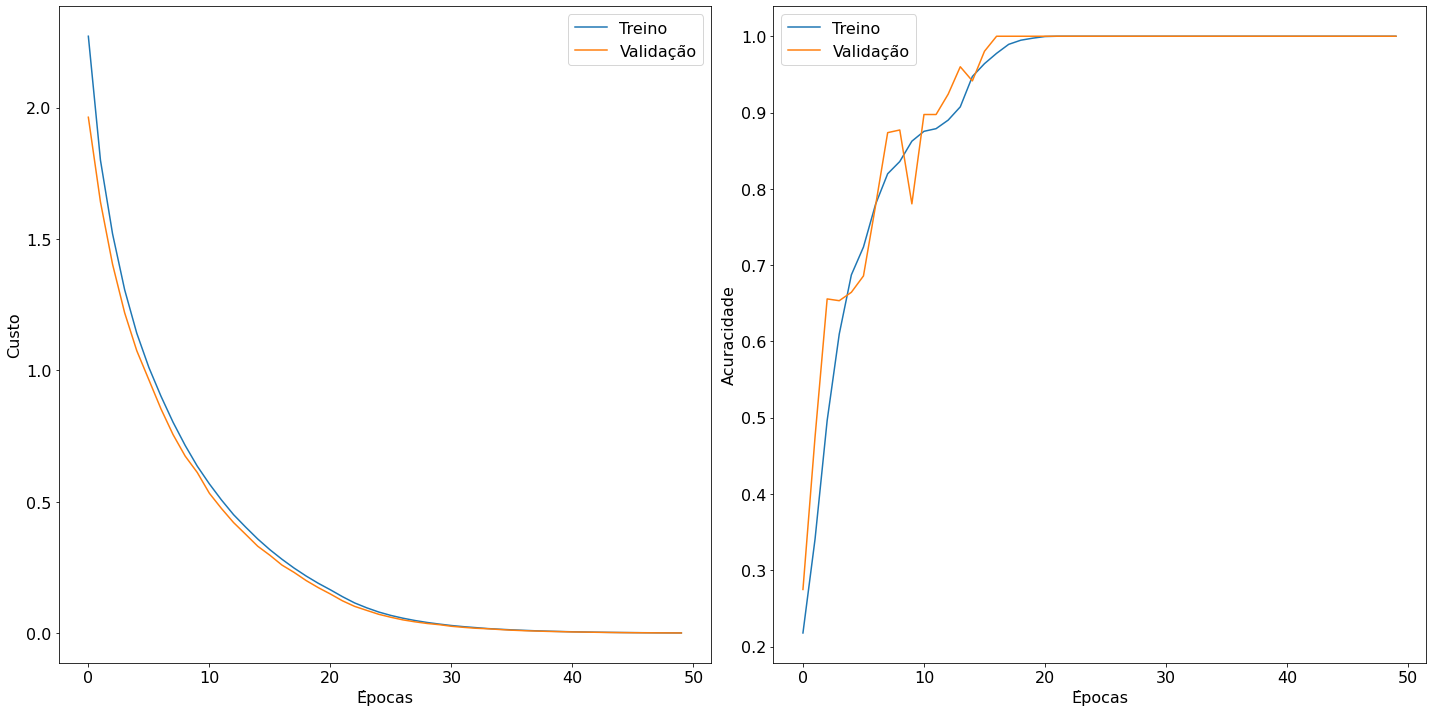

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Treino')
plt.plot(history.history['val_loss'], label = 'Validação')
plt.xlabel('Épocas', size = 16)
plt.ylabel('Custo', size = 16)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.legend(prop = {'size': 16})
plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], label = 'Treino')
plt.plot(history.history['val_categorical_accuracy'], label = 'Validação')
plt.xlabel('Épocas', size = 16)
plt.ylabel('Acuracidade', size = 16)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.legend(prop = {'size': 16})
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(previsoes2, classe_teste2)
print(cm)

[[ 30   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  41   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  33   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  34   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 238   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 223   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  36   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  41   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  32   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 227   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 225   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  30   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  40   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  46   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 210 

In [ ]:
classes = ['tr1', 'tr2', 'tr3', 'tr4', 'tr5','tr6','tr7','tr8','tr9','tr10','tr11','tr12','tr13','tr14','tr15']

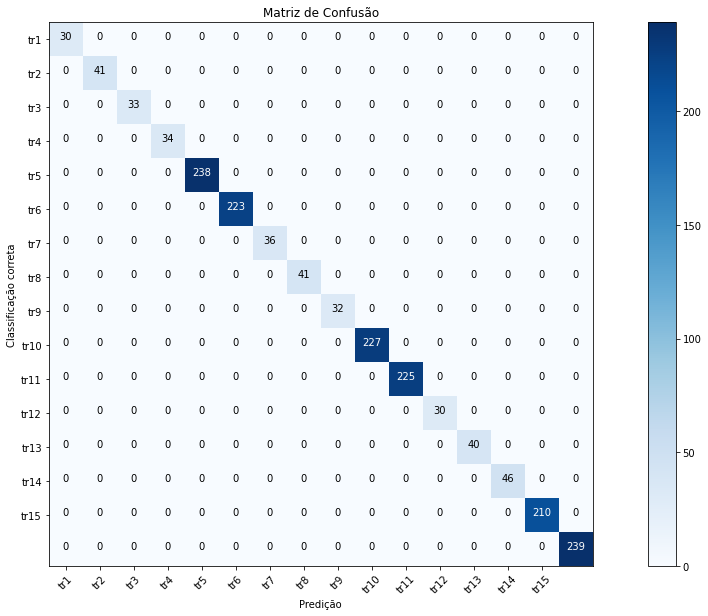

In [ ]:
titulo = 'Matriz de Confusão'
fig = plt.figure(figsize = (20,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(titulo)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center',
           color='white' if cm[i,j] > thresh else 'black')

plt.ylabel('Classificação correta')
plt.xlabel('Predição')
plt.savefig('matriz_confu.png')

In [ ]:
model_json = classificador.to_json()
with open('network.json', 'w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
save_model(classificador,'/content/weights.hdf5')

In [ ]:
novo_registro = np.array([2,2,1,1,1])
novo_registro = novo_registro.reshape(1, -1)

In [ ]:
previsao = classificador.predict(novo_registro)

1/1 [==============================] - 0s 23ms/step


In [ ]:
np.argmax(previsao)

6